In [188]:
# Dependencies
from pathlib import Path
import pandas as pd
import matplotlib.pyplot as plt
from datetime import datetime
import yfinance as yf
from plotly.subplots import make_subplots


In [189]:
#start = datetime.datetime(2014,3,5)
#end = datetime.datetime(2024,3,4)
start_date = '2014-03-05'
end_date = '2024-03-05'


In [190]:
#set ticker lists
tickers = ['AMZN','AAPL','META','NFLX']

In [191]:
# Create placeholder for data
data = pd.DataFrame(columns=tickers)


In [192]:
# Fetch the data
for ticker in tickers:
    data[ticker] = yf.download(ticker, 
                               start_date,
                               end_date)['Close']
    
# Print first 5 rows of the data
data.head(10)

[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


,AMZN,AAPL,META,NFLX
Date,,,,
2014-03-05,18.618500,19.012857,71.570000,64.785713
2014-03-06,18.608000,18.955357,70.839996,64.358574
2014-03-07,18.603001,18.944286,69.800003,64.052856
2014-03-10,18.526501,18.961430,72.029999,62.849998
2014-03-11,18.441000,19.146070,70.099998,62.497143
2014-03-12,18.532000,19.164642,70.879997,62.368572
2014-03-13,18.575500,18.951786,68.830002,61.437141
2014-03-14,18.687000,18.738930,67.720001,60.641430
2014-03-17,18.752001,18.812143,68.739998,60.388573


In [193]:
data.describe()

,AMZN,AAPL,META,NFLX
count,2517.000000,2517.000000,2517.000000,2517.000000
mean,86.841694,80.748028,184.281657,282.709641
std,51.668508,57.391090,86.064636,167.100759
min,14.347500,18.498571,56.139999,44.887142
25%,38.007999,31.107500,117.949997,117.099998
50%,88.238503,50.180000,172.169998,294.070007
75%,130.380005,138.979996,232.500000,400.480011
max,186.570496,198.110001,502.299988,691.690002


In [194]:
data.info

<bound method DataFrame.info of                   AMZN        AAPL        META        NFLX
Date                                                      
2014-03-05   18.618500   19.012857   71.570000   64.785713
2014-03-06   18.608000   18.955357   70.839996   64.358574
2014-03-07   18.603001   18.944286   69.800003   64.052856
2014-03-10   18.526501   18.961430   72.029999   62.849998
2014-03-11   18.441000   19.146070   70.099998   62.497143
...                ...         ...         ...         ...
2024-02-27  173.539993  182.630005  487.049988  601.669983
2024-02-28  173.160004  181.419998  484.019989  596.479980
2024-02-29  176.759995  180.750000  490.130005  602.919983
2024-03-01  178.220001  179.660004  502.299988  619.340027
2024-03-04  177.580002  175.100006  498.190002  615.830017

[2517 rows x 4 columns]>

In [195]:
# Check if data contains any null values
data.isnull().sum()

AMZN    0
AAPL    0
META    0
NFLX    0
dtype: int64

In [196]:
# Getting dataframe info
data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2517 entries, 2014-03-05 to 2024-03-04
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   AMZN    2517 non-null   float64
 1   AAPL    2517 non-null   float64
 2   META    2517 non-null   float64
 3   NFLX    2517 non-null   float64
dtypes: float64(4)
memory usage: 98.3 KB


PLOT THE DATA

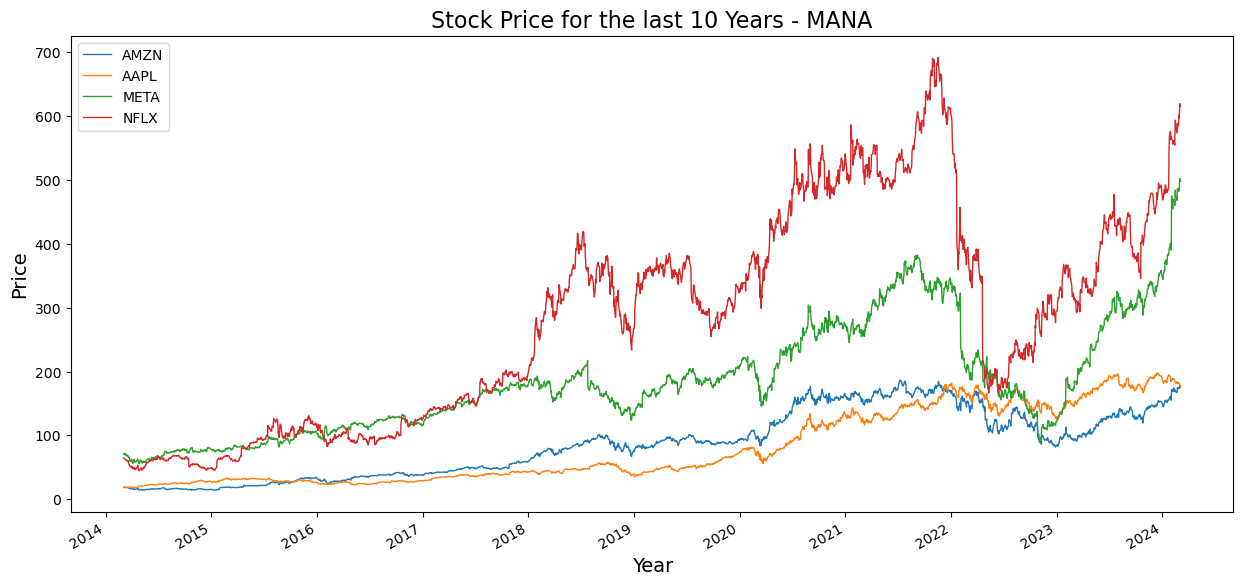

In [197]:
# Define a function to plot the entire dataframe
# Plot all the Closing Stock Price
data.plot(figsize = (15,7), linewidth = 1)

# Show the legend
plt.legend()

# Define the label for the title of the figure
plt.title("Stock Price for the last 10 Years - MANA", fontsize=16)

# Define the labels for x-axis and y-axis
plt.ylabel('Price', fontsize=14)
plt.xlabel('Year', fontsize=14)


plt.show()

INTERACTIVE DATA VISUALIZATION

In [199]:
from ipywidgets import interact, Button

def interactive_plot(column):
  
  # Plots the closing price for the chosen column with a unique color and shows the corresponding legend.
  
  fig, ax = plt.subplots(figsize=(10, 5), linewidth = 1)

  # Create a colormap for generating unique colors
  cmap = plt.cm.get_cmap('tab10')  # Choose a colormap (adjust as needed)
  colors = cmap(range(len(data.columns[0:])))  # Create colors for each column

  # Explicitly plot the line and set its color based on the column
  line, = ax.plot(data[column], label=column, color=colors[data.columns.tolist().index(column) - 0])

  # Display the legend
  ax.legend()
  # return fig, ax # Return the updated figure and axes

#Callback function for the save button to export the current plot as a JPEG file.
# def save_plot(b):
# fig.savefig("interactive_plot.jpg", format="jpg")  # Adjust filename as needed

  plt.title("Stock Price for the last 10 years", fontsize=16)
  plt.ylabel('Price', fontsize=14)
  plt.xlabel('Year', fontsize=14)
  plt.show()

# Add a button for saving the plot
# save_button = Button(description="Save plot")
# save_button.on_click(save_plot)

interact(interactive_plot, column=data.columns[0:])  # Start from first column
# display(save_button)  # Display the button

interactive(children=(Dropdown(description='column', options=('AMZN', 'AAPL', 'META', 'NFLX'), value='AMZN'), …

<function __main__.interactive_plot(column)>

STOCK NORMALISATION calculated in min max scalling. 


In [200]:
# Stock normalisation used in this calculation is a min max scalling.

def normalize(data):
    x = data.copy() # creates a copy of the input dataframe, to ensure that original data in dataframe remains unchanged
    for i in x.columns[0:]: # iterates through the column from the beginning of index (0) to the end
        x[i] = x[i]/x[i][0] # index (0) is used as a reference for the normalisation
    return x

In [201]:
print(normalize(data))

                AMZN      AAPL      META      NFLX
Date                                              
2014-03-05  1.000000  1.000000  1.000000  1.000000
2014-03-06  0.999436  0.996976  0.989800  0.993407
2014-03-07  0.999168  0.996393  0.975269  0.988688
2014-03-10  0.995059  0.997295  1.006427  0.970121
2014-03-11  0.990466  1.007006  0.979461  0.964675
...              ...       ...       ...       ...
2024-02-27  9.320837  9.605605  6.805226  9.287078
2024-02-28  9.300427  9.541964  6.762889  9.206968
2024-02-29  9.493783  9.506725  6.848261  9.306373
2024-03-01  9.572200  9.449395  7.018304  9.559824
2024-03-04  9.537826  9.209558  6.960878  9.505645

[2517 rows x 4 columns]


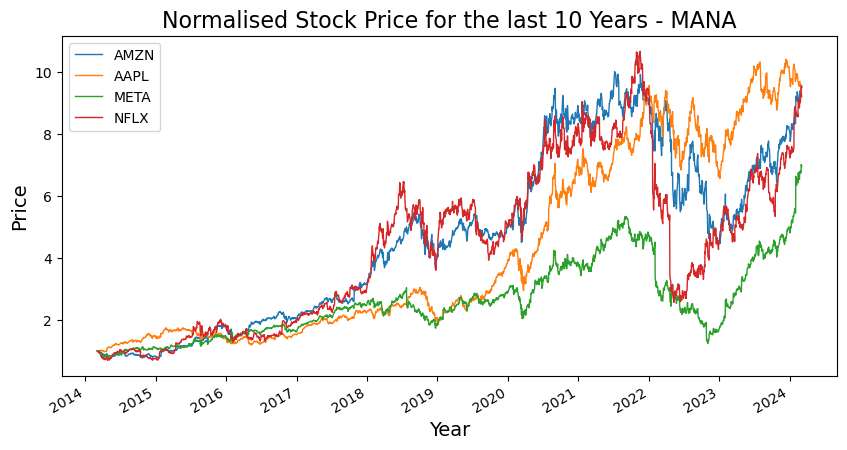

In [202]:

# Plotting Daily Normalised Stock

normalize(data).plot(figsize = (10,5), linewidth = 1)

# Show the legend
plt.legend()

# Define the label for the title of the figure
plt.title("Normalised Stock Price for the last 10 Years - MANA", fontsize=16)

# Define the labels for x-axis and y-axis
plt.ylabel('Price', fontsize=14)
plt.xlabel('Year', fontsize=14)


plt.show()


200 DAYS NORMALISATION

In [214]:
# import pandas as pd

def calculate_200day_ma(data):
 
  # Calculates the 200 day moving average for each column in the DataFrame.
  # Data: A Pandas DataFrame containing the data.
  # Returns: A new Pandas DataFrame with a '200d_MA' column added for each original column.
  
  result = data.copy()  # Create a copy to avoid modifying original data
  window = 200  # Define the window size for moving average (20 days)

  # Add a new column for the 200 day moving average of each existing column
  for col in data.columns:
    result['{}_200d_MA'.format(col)] = data[col].rolling(window=window).mean()

  return result


In [215]:
print(calculate_200day_ma(data))

                  AMZN        AAPL        META        NFLX  AMZN_200d_MA  \
Date                                                                       
2014-03-05   18.618500   19.012857   71.570000   64.785713           NaN   
2014-03-06   18.608000   18.955357   70.839996   64.358574           NaN   
2014-03-07   18.603001   18.944286   69.800003   64.052856           NaN   
2014-03-10   18.526501   18.961430   72.029999   62.849998           NaN   
2014-03-11   18.441000   19.146070   70.099998   62.497143           NaN   
...                ...         ...         ...         ...           ...   
2024-02-27  173.539993  182.630005  487.049988  601.669983     139.22015   
2024-02-28  173.160004  181.419998  484.019989  596.479980     139.52505   
2024-02-29  176.759995  180.750000  490.130005  602.919983     139.85755   
2024-03-01  178.220001  179.660004  502.299988  619.340027     140.19265   
2024-03-04  177.580002  175.100006  498.190002  615.830017     140.51355   

           

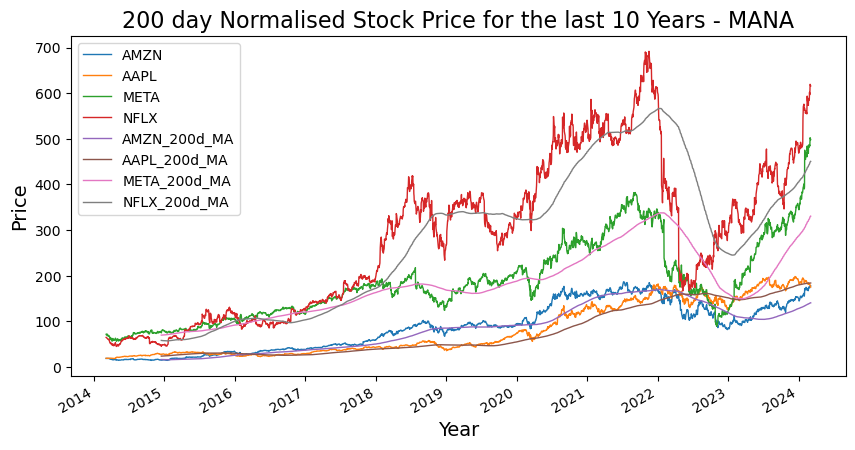

In [226]:
# Plot on 200 days Normalised Stock

calculate_200day_ma(data).plot(figsize = (10,5), linewidth = 1)

# Show the legend
plt.legend()

# Define the label for the title of the figure
plt.title("200 day Normalised Stock Price for the last 10 Years - MANA", fontsize=16)

# Define the labels for x-axis and y-axis
plt.ylabel('Price', fontsize=14)
plt.xlabel('Year', fontsize=14)


plt.show()

TEST

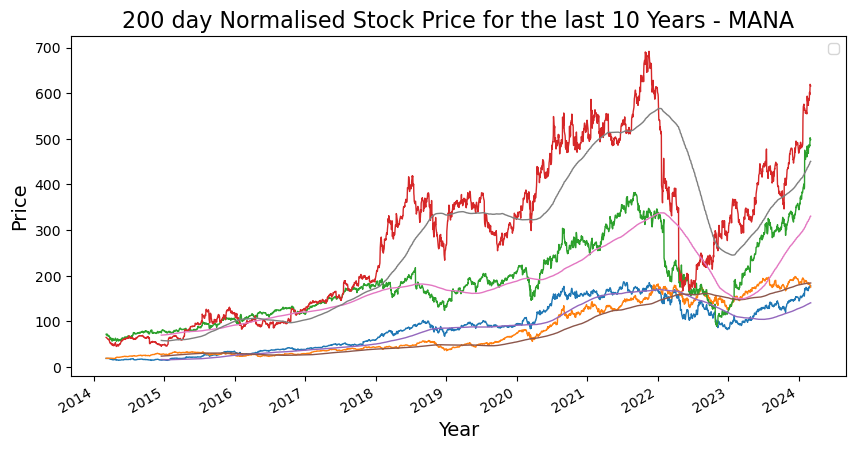

In [227]:
# Plot on 200 days Normalised Stock

calculate_200day_ma(data).plot(figsize = (10,5), linewidth = 1)

# Get handles and labels from the existing legend
handles, labels = plt.gca().get_legend_handles_labels()

# Filter handles and labels based on your criteria (e.g., moving average labels)
# Assuming moving average labels end with '_20d_MA'
filtered_handles = [handle for handle, label in zip(handles, labels) if label.endswith('_20d_MA')]
filtered_labels = [label for label in labels if label.endswith('_20d_MA')]

# Create a new legend with the filtered entries
plt.legend(filtered_handles, filtered_labels)

# # Show the legend
# plt.legend()

# Define the label for the title of the figure
plt.title("200 day Normalised Stock Price for the last 10 Years - MANA", fontsize=16)

# Define the labels for x-axis and y-axis
plt.ylabel('Price', fontsize=14)
plt.xlabel('Year', fontsize=14)


plt.show()

END TEST

In [218]:
from ipywidgets import interact, Button

def interactive_plot1(column):
  
  # Plots the closing price for the chosen column with a unique color and shows the corresponding legend.
  
  fig, ax = plt.subplots(figsize=(10, 5), linewidth = 1)

  # Create a colormap for generating unique colors
  cmap = plt.cm.get_cmap('tab10')  # Choose a colormap (adjust as needed)
  colors = cmap(range(len(calculate_200day_ma(data).columns[0:])))  # Create colors for each column

  # Explicitly plot the line and set its color based on the column
  line, = ax.plot(calculate_200day_ma(data)[column], label=column, color=colors[calculate_200day_ma(data).columns.tolist().index(column) - 0])

  # Display the legend
  ax.legend()
  # return fig, ax # Return the updated figure and axes

#Callback function for the save button to export the current plot as a JPEG file.
# def save_plot(b):
# fig.savefig("interactive_plot.jpg", format="jpg")  # Adjust filename as needed

  plt.title("200 day Normalised Stock Price for the last 10 years", fontsize=16)
  plt.ylabel('Price', fontsize=14)
  plt.xlabel('Year', fontsize=14)
  plt.show()

# Add a button for saving the plot
# save_button = Button(description="Save plot")
# save_button.on_click(save_plot)

interact(interactive_plot1, column=calculate_200day_ma(data).columns[0:])  # Start from first column
# display(save_button)  # Display the button

interactive(children=(Dropdown(description='column', options=('AMZN', 'AAPL', 'META', 'NFLX', 'AMZN_200d_MA', …

<function __main__.interactive_plot1(column)>

CONCLUSION QUESTION 1.
MANA's price was trending up from 2014 to the end of 2021. In contrast, META and NFLX saw significant drops of more than 50% at the beginning of 2022. Meanwhile, AMZN and AAPL's prices remained relatively stable.

NFLX started to recover in the second quarter of 2022, and META followed suit by the last quarter. Both stocks have been on an upward trend since then.

AMZN and AAPL experienced a slight dip in mid-2022, with some fluctuations at the start of 2023. However, they've shown a slight increase towards the beginning of 2024.

TEST

In [231]:
from ipywidgets import interact, Button
import matplotlib.pyplot as plt

from ipywidgets import interact, Dropdown

def interactive_plot2(column1, column2):
    
    fig, ax = plt.subplots(figsize=(10, 5), linewidth=1)

    cmap = plt.cm.get_cmap('tab10')  # Choose a colormap (adjust as needed)
    colors = cmap(range(len(calculate_200day_ma(data).columns[0:])))

    # Plot lines with unique colors
    line1, = ax.plot(calculate_200day_ma(data)[column1], label=column1, color=colors[calculate_200day_ma(data).columns.tolist().index(column1) - 0])
    line2, = ax.plot(calculate_200day_ma(data)[column2], label=column2, color=colors[calculate_200day_ma(data).columns.tolist().index(column2) - 0])

    # --- Modified legend handling ---
    if hasattr(plt, 'legend_elements'):  # Check for `legend_elements` (newer Matplotlib versions)
        handles, labels = plt.legend_elements(prop='label')
        filtered_handles = [handle for handle, label in zip(handles, labels) if label in [column1, column2]]
        plt.legend(filtered_handles, [column1, column2])
    else:  # Fallback for older Matplotlib versions
        handles, labels = plt.gca().get_legend_handles_labels()
        filtered_handles = [handle for handle, label in zip(handles, labels) if label in [column1, column2]]
        plt.legend(filtered_handles, [column1, column2])

    plt.title("Stock Price for the last 10 years", fontsize=16)
    plt.ylabel('Price', fontsize=14)
    plt.xlabel('Year', fontsize=14)
    plt.show()

# Get all column names for dropdown options
column_options = calculate_200day_ma(data).columns.tolist()

# Create two dropdown menus
dropdown1 = Dropdown(
    title='Select Column 1:',
    options=column_options,
    value=column_options[0]  # Set initial default value
)

dropdown2 = Dropdown(
    title='Select Column 2:',
    options=column_options,
    value=column_options[1]  # Set initial default value (different from dropdown1)
)

# Use interact to link the dropdown selections to the plot function
interact(interactive_plot2, column1=dropdown1, column2=dropdown2)

interactive(children=(Dropdown(description='column1', options=('AMZN', 'AAPL', 'META', 'NFLX', 'AMZN_200d_MA',…

<function __main__.interactive_plot2(column1, column2)>

END OF TEST